# Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
import warnings
warnings.filterwarnings("ignore")

In [2]:
salary_train = pd.read_csv("/SalaryData_Train.csv")
salary_test = pd.read_csv("/SalaryData_Test.csv")

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# Applying lable encoder to Salary column (Y Variable which is Categorial) and sex coloumn for both train and test data set
label_encoder = preprocessing.LabelEncoder() #<=50K :0 & >50K :1 for salary ; Male :1 & Female :0 for sex
salary_train["Salary"] = label_encoder.fit_transform(salary_train["Salary"]) 
salary_test["Salary"] = label_encoder.fit_transform(salary_test["Salary"]) 
salary_train["sex"] = label_encoder.fit_transform(salary_train["sex"]) 
salary_test["sex"] = label_encoder.fit_transform(salary_test["sex"]) 

# Dummies for X Variables
salary_train = pd.get_dummies(salary_train)
salary_test = pd.get_dummies(salary_test)
salary_train.head()

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Dividing our data into X and Y variables for train as well as test dataset
X1 = pd.concat([salary_train.iloc[:,0:6],salary_train.iloc[:,7:]],axis = 1)
Y1 = salary_train.iloc[:,6]
X2 = pd.concat([salary_test.iloc[:,0:6],salary_test.iloc[:,7:]],axis = 1)
Y2 = salary_test.iloc[:,6]

In [7]:
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X1,Y1)
train_pred_mc = classifier_mb.predict(X1)
accuracy_train_mc = np.mean(train_pred_mc==Y1)

test_pred_mc = classifier_mb.predict(X2)
accuracy_test_mc = np.mean(test_pred_mc==Y2)

In [8]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(X1,Y1) 
train_pred_gc = classifier_gb.predict(X1)
accuracy_train_gc = np.mean(train_pred_gc==Y1)

test_pred_gc = classifier_gb.predict(X2)
accuracy_test_gc = np.mean(test_pred_gc==Y2)

In [9]:
print("Multinomial Naive Bayes:","\nAccuracy on Train -",round(accuracy_train_mc*100,2),"%","\nAccuracy on Test  -",
      round(accuracy_test_mc*100,2)," %")
print("\nGaussian Naive Bayes:","\nAccuracy on Train -",round(accuracy_train_gc*100,2),"%","\nAccuracy on Test  -",
      round(accuracy_test_gc*100,2),"%")

Multinomial Naive Bayes: 
Accuracy on Train - 77.29 % 
Accuracy on Test  - 77.5  %

Gaussian Naive Bayes: 
Accuracy on Train - 81.1 % 
Accuracy on Test  - 80.95 %


In [10]:
#accuracy for Multinomial Naive Bayes-CountVectorizer using confusion matrix
print(classification_report(Y2,test_pred_mc))
print("Accuracy-","%.2f%%" %(accuracy_score(Y2,test_pred_mc)*100))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

Accuracy- 77.50%


**It can be seen that Accuracy of 81.1% in Train & 80.95% is achieved using Gaussian Naive Bayes Suggested to follow the same.**

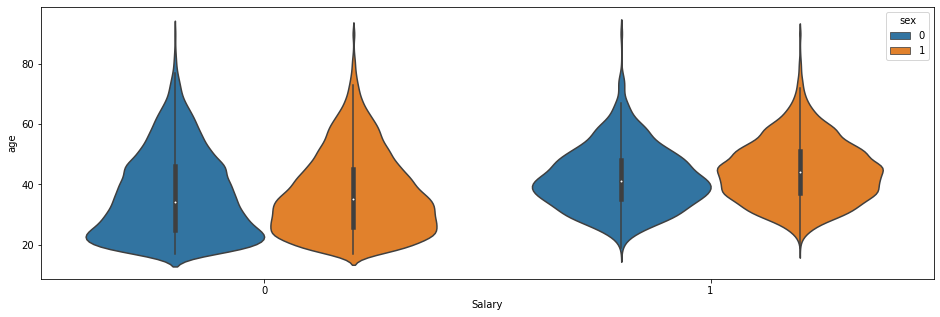

In [11]:
# <=50K :0 & >50K :1 for salary ; Male :1 & Female :0 for sex
viz=salary_train.append(salary_test, ignore_index = True)
f, ax = plt.subplots(figsize=(16,5))
sns.violinplot(x="Salary",y="age",hue="sex",data=viz);